# Test project on supervised learning models - Tree-based methods



## This assessment project can be completed in three different ways - we discuss this in the assessment video lecture!

----

**The verification project can be completed in one of three ways:**
    1. Open a new Jupyter Notebook, load data from the file - and then independently perform data analysis and visualization, as well as create a predictive model.
    2. Use the assignment notebook as a general guide to action, completing the assignments written in bold.
    3. Immediately go to the notebook with solutions and video lectures with solutions, and in parallel with watching the lectures, complete these tasks in your notebook.

------
------

## GOAL: Create a model for predicting whether a subscriber will churn.

----
----


## Complete the tasks below, indicated in bold!

## Part 0: Importing libraries and loading data

**Task: Run the prepared cells below to import libraries and load data from a file into a dataframe. The file is called "Telco-Customer-Churn.csv"**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: General data characteristics

**Task: Using the .info() method, check the data types for the columns and whether there are missing values in your dataframe.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**Assignment: Print statistical metrics for numeric columns using .describe(). You'll see that most of the columns are categorical, so you'll need to create dummy variables for them later.**

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 2: Exploratory Data Analysis

## Feature research

**Task: Check that there are no missing values in this data - to do this, print the number of NaN values separately for each column.**

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**TASK: Create a CountPlot to check whether the column values are balanced with the classes (Churn).**

<Axes: xlabel='Churn', ylabel='count'>

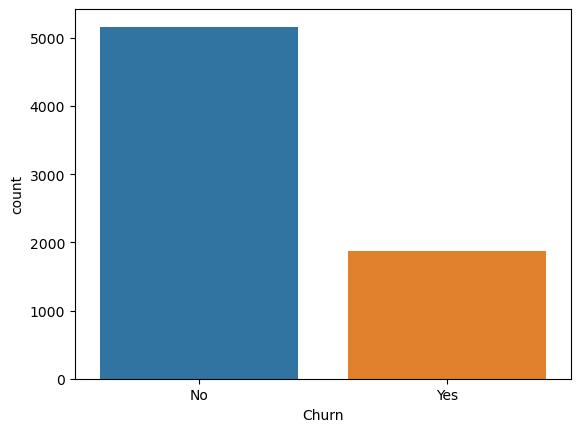

In [9]:
sns.countplot(data = df, x='Churn')

**TASK: Explore the distribution of the TotalCharges column across different Churn categories using a Box Plot or Violin Plot.**

<Axes: xlabel='Churn', ylabel='TotalCharges'>

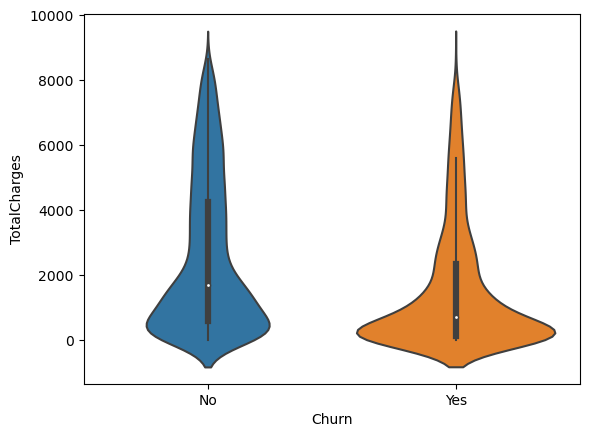

In [10]:
sns.violinplot(data=df,x="Churn", y='TotalCharges')

**Task: Construct a boxplot with the distribution of the TotalCharges column for various types of contracts, and also add colors for the Churn column.**

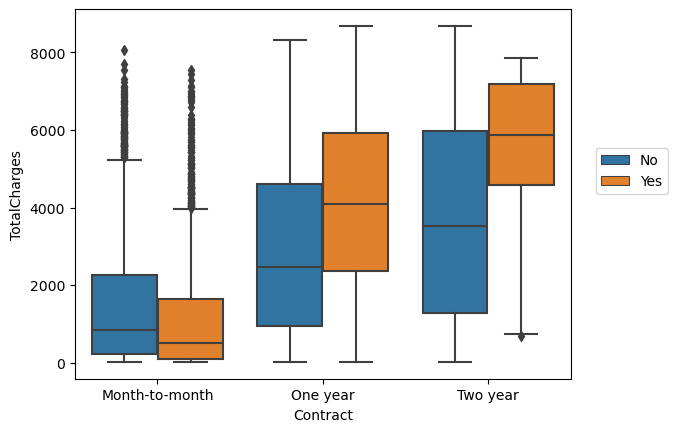

In [11]:
sns.boxplot(data=df, x='Contract', y="TotalCharges", hue='Churn')
plt.legend(loc=(1.05,0.5))

**Task: Construct a barplot with the correlation of the following features with the target variable. Note that for categorical features, you must first convert them to dummy variables because correlation is calculated only for numeric columns.**

     ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***We specifically provided a list of signs so as not to check all the signs. The fact is that some characteristics have too many unique values for such an analysis, for example the customerID column.***

In [12]:
df_corr = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]).corr()

In [13]:
sort_df_corr = df_corr['Churn_Yes'].sort_values()[1:-1]

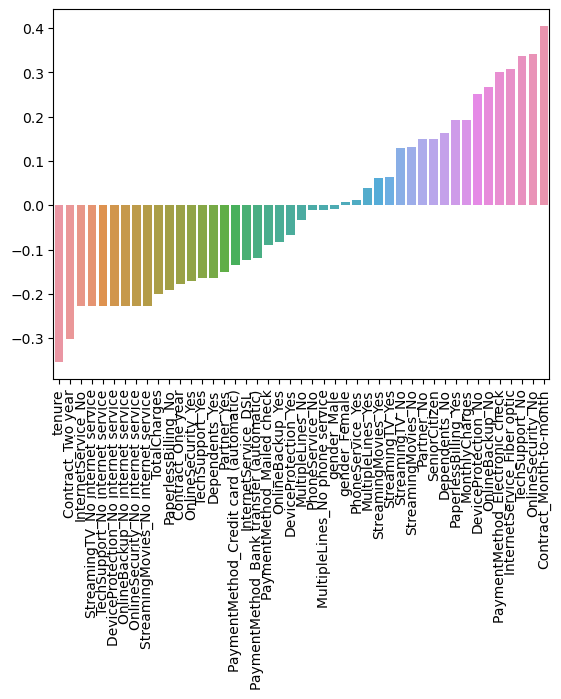

In [14]:
sns.barplot(x= sort_df_corr.index, y = sort_df_corr.values)
plt.xticks(rotation=90);

---
---

# Part 3: Churn Analysis

**In these tasks we will perform subscriber segmentation based on the tenure column, creating “cohorts” and comparing data between different cohorts.**

**Task: List 3 types of contract (Contract column).**

In [15]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Task: Create a histogram with the distribution of values in the tenure column - this is the number of months, how long a person has been (or was) a subscriber of the company.**

<Axes: xlabel='tenure', ylabel='Count'>

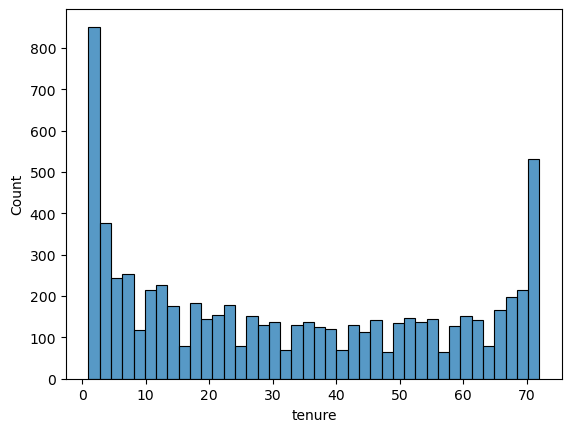

In [16]:
sns.histplot(data=df, x = 'tenure', bins=40)

**Task: Construct histograms for the tenure column, dividing the data into two columns - Churn and Contract. Check out the seaborn documentation or the seaborn notebooks to remember how to do this.**

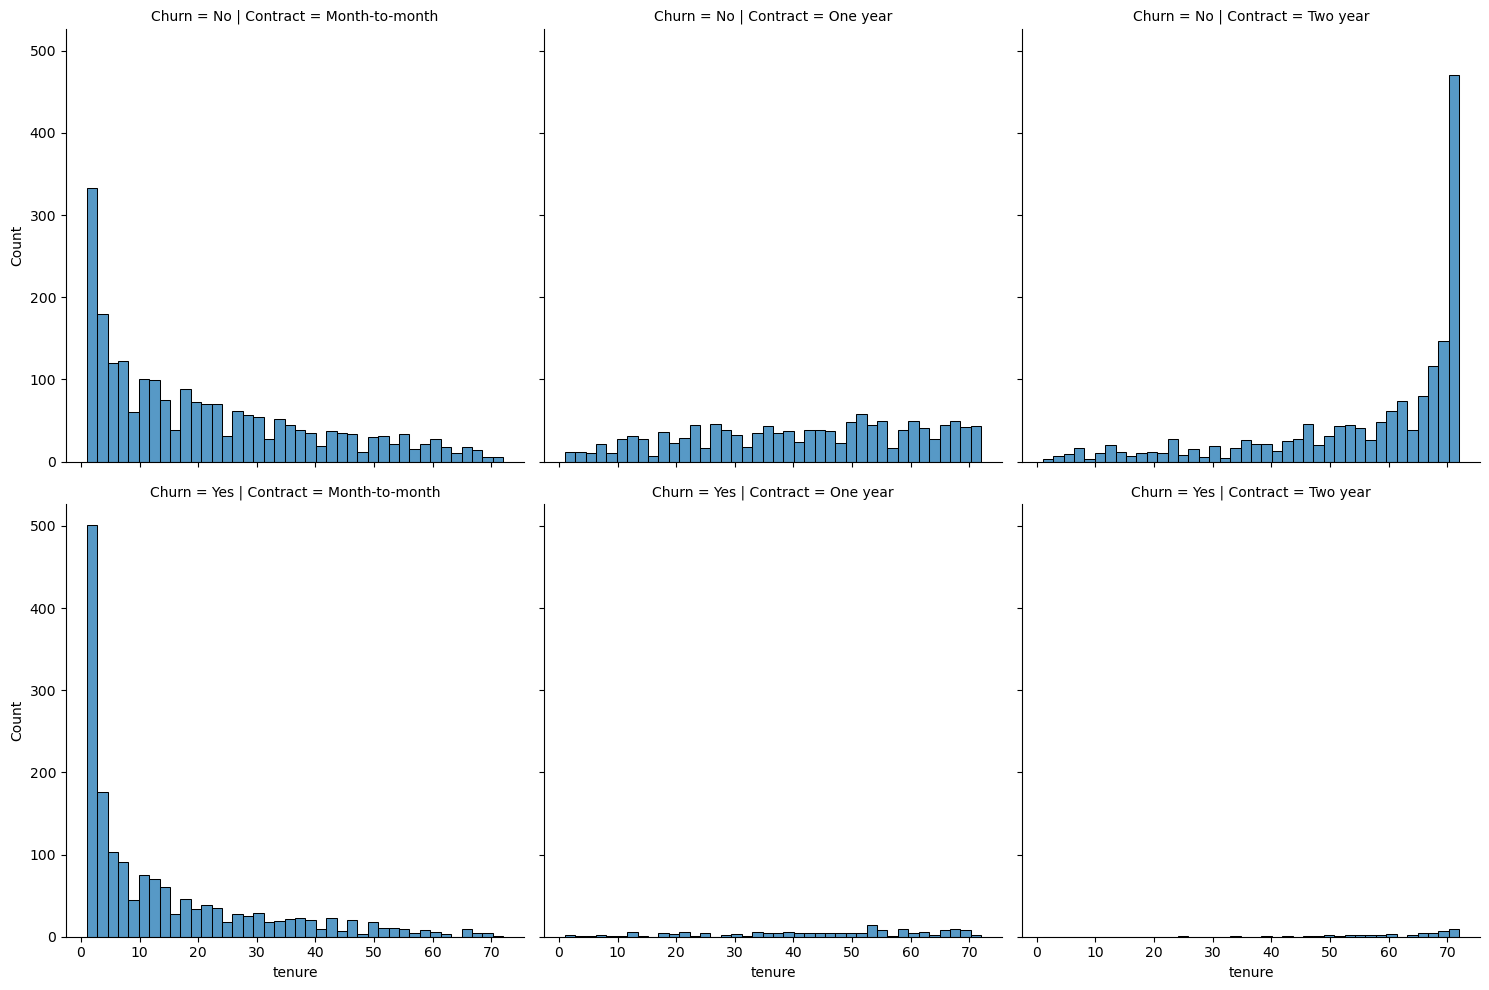

In [17]:
sns.displot(data=df, x = 'tenure', bins=40, row="Churn", col="Contract")

**Task: Create a scatterplot for the Total Charges and Monthly Charges columns, coloring the graph using the Churn column.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

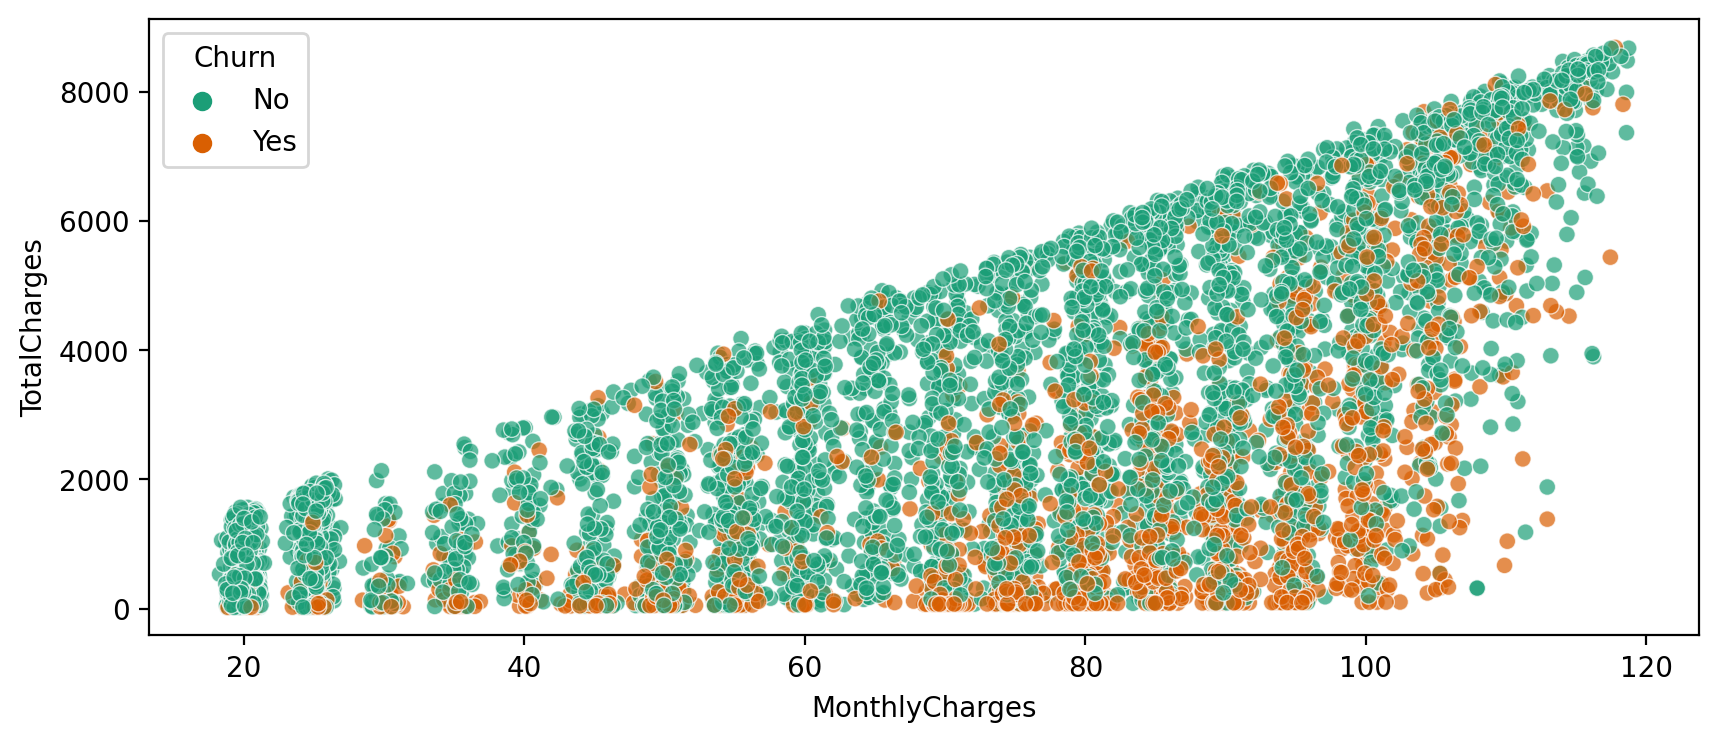

In [18]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.7,
                palette="Dark2")

### Creating cohorts (segments) using the Tenure column

**First, let’s put different tenure values (1 month, 2 months, 3 months, and so on) into separate cohorts (segments).**

**Task: For each unique value of the tenure column as a cohort, calculate the churn rate - this is the number of people who churn in the cohort as a percentage of the total number of people in this cohort. Calculate this percentage separately for each cohort. For example, for a cohort with tenure = "1 month" the churn rate should be 61.99%. As a result, you should get cohorts from 1 to 72 months, and as the number of months increases, the churn rate should decrease. This is reasonable, because the longer a person uses the services of a company, the more likely it is that he/she is satisfied with everything and will continue to use these services.**

In [19]:
churn_yes = df.groupby(["Churn","tenure"]).count().transpose()['Yes']
churn_no = df.groupby(["Churn","tenure"]).count().transpose()['No']

In [20]:
churn_rate = 100 * churn_yes/(churn_no+churn_yes)

In [21]:
churn_rate = round(churn_rate.transpose()["customerID"],2)

In [22]:
churn_rate

tenure
1     61.99
2     51.68
3     47.00
4     47.16
5     48.12
      ...  
68     9.00
69     8.42
70     9.24
71     3.53
72     1.66
Name: customerID, Length: 72, dtype: float64

**Task: Using the results of the previous task, plot the churn percentage for different tenure values.**

<Axes: xlabel='tenure'>

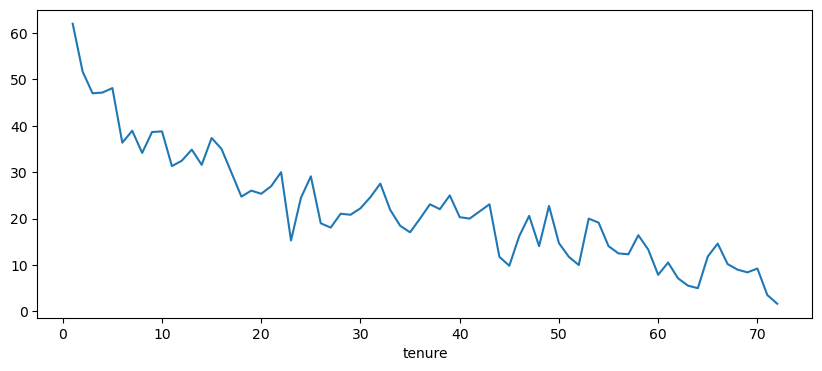

In [23]:
plt.figure(figsize=(10,4), dpi=100)
churn_rate.plot()

### Larger cohorts (segments)
**Assignment: Based on the tenure column, create a new column called “Tenure Cohort”, which will have the following 4 categories:**
    * '0-12 months'
    * '24-48 months'
    * '12-24 months'
    * 'More than 48 months'

In [24]:
# Напишите Ваш код в этой ячейке
def get_tenure_chort(data):
    if data in range(0,13):
        return "0-12 месяцев"
    elif data in range(12,25):
        return "12-24 месяцев"
    elif data in range(24,49):
        return "24-48 месяцев"
    else:
        return 'Более 48 месяцев'

In [25]:
df["Tenure Cohort"] = df['tenure'].apply(get_tenure_chort)

**Task: Create a scatterplot for Total Charges and Monthly Charts, coloring the graph in different colors according to the "Tenure Cohort" column that you created in the previous task.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

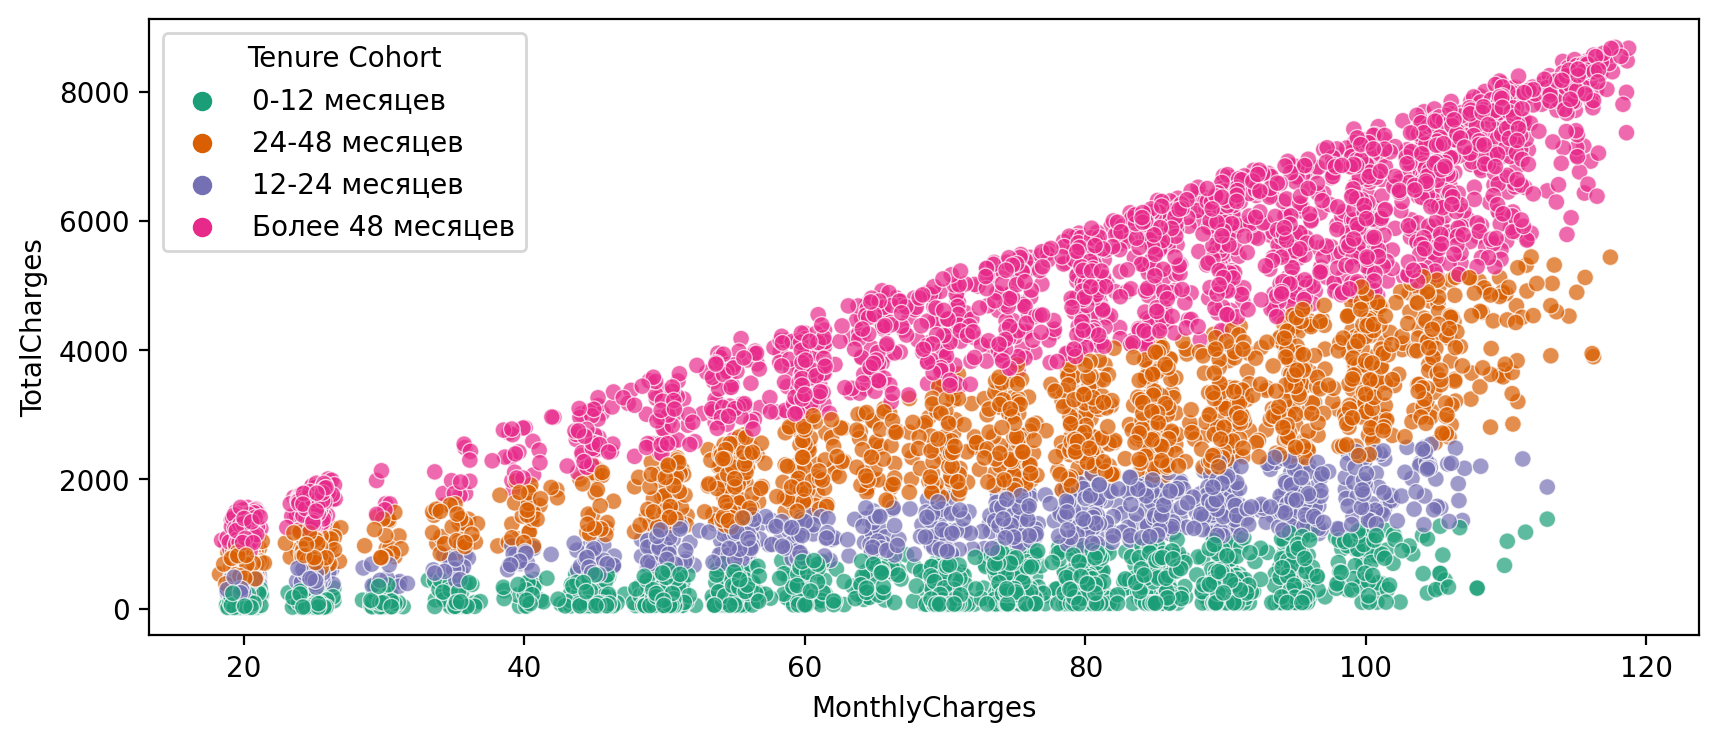

In [26]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue="Tenure Cohort", alpha=0.7,
                palette="Dark2")

**Task: Construct a countplot with the number of people who left and those who did not churn in each cohort.**

<Axes: xlabel='Tenure Cohort', ylabel='count'>

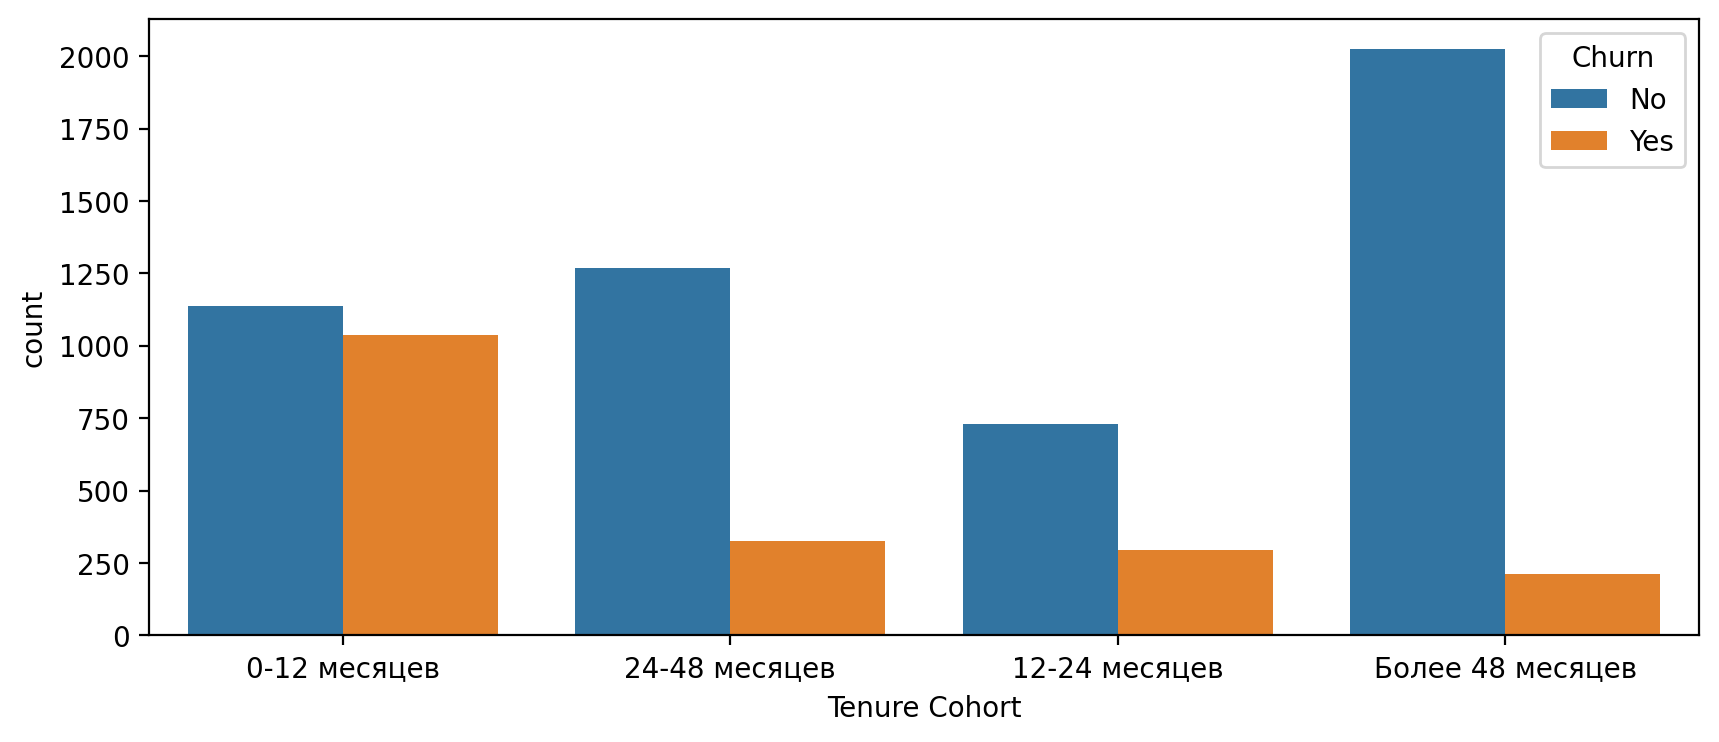

In [27]:
plt.figure(figsize=(10,4), dpi=200)
sns.countplot(data=df, x = "Tenure Cohort", hue = "Churn")

**TASK: Create a set of CountPlots of the number of people by different Tenure Cohorts. For each type of contract, create a separate chart, and color these charts in different colors according to the Churn column.**

<Figure size 1100x800 with 0 Axes>

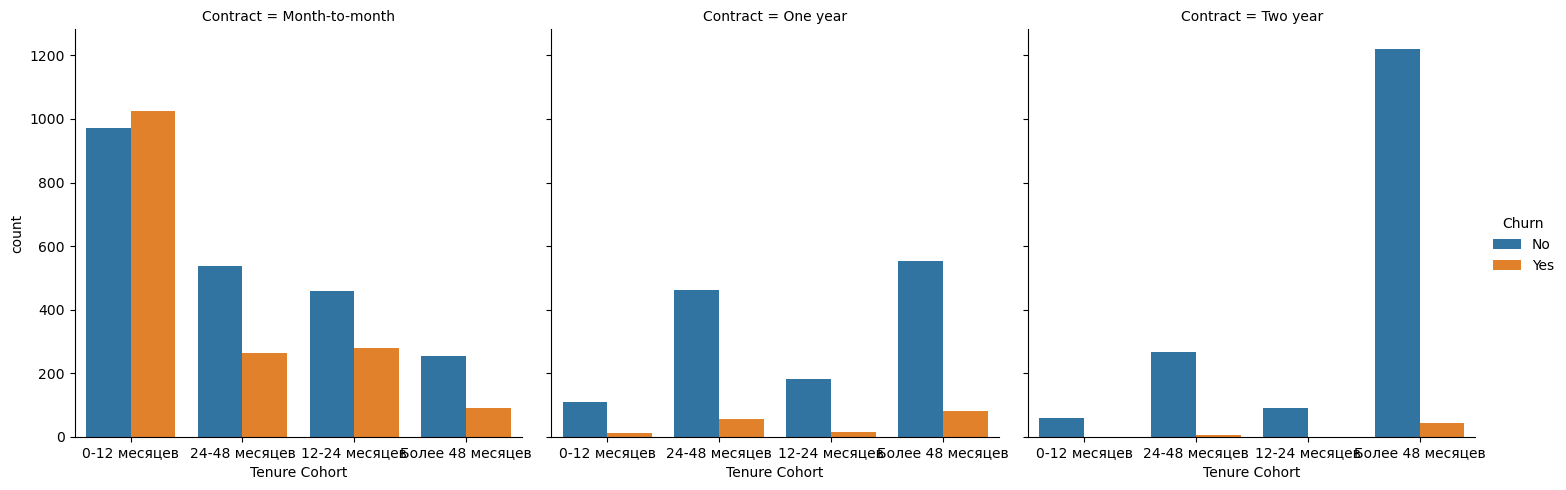

In [28]:
plt.figure(figsize=(11,8), dpi=100)
sns.catplot(data = df , x='Tenure Cohort', 
            hue ='Churn',kind='count', col="Contract");

-----

# Part 4: Predictive model

**Let's explore 4 tree-based models: single decision tree, random forest, adaptive boosting and gradient boosting. If you wish, you can additionally try any other machine learning models with a teacher (supervised learning models) and compare the results!**


## One Decision Tree

**Task: Divide all data into features X and target variable Y. Create dummy variables where necessary and also see if there are any features that could be removed.**

In [29]:
df = df.drop(['Tenure Cohort','customerID'], axis=1)

In [30]:
df_obj = df.select_dtypes(include="object")
df_num = df.select_dtypes(exclude="object")
df_obj= pd.get_dummies(df_obj,drop_first=True)

In [31]:
df = pd.concat([df_num,df_obj], axis=1)

In [32]:
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

**Task: Perform a train test split, setting aside 10% of the data for testing. In solutions we use random_state=101.**

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Task: Build a Decision Tree model and evaluate its performance. To do this, follow these steps:**
    1. Train a decision tree model (you can optionally perform a grid search to find optimal hyperparameter values).
    2. Evaluate the performance metrics of the decision tree model - to do this, print a “classification report” and draw a graph with a confusion matrix.
    2. Look at the importance of the features for the resulting decision tree.
    4. Optional: Draw a graph of the resulting tree. Please note that if the tree is very large and you have not trimmed the tree using parameters, calling the plot_tree method may result in an error.

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

In [95]:
tree_classifier = DecisionTreeClassifier(max_depth=5)

In [96]:
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [97]:
predict = tree_classifier.predict(X_test)

In [98]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       557
           1       0.52      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704



In [112]:
confusion_matrix(y_test, predict)

array([[497,  60],
       [ 83,  64]])

In [111]:
features = pd.DataFrame(tree_classifier.feature_importances_, 
                        index=X.columns, columns=['Features Importance']).sort_values("Features Importance")

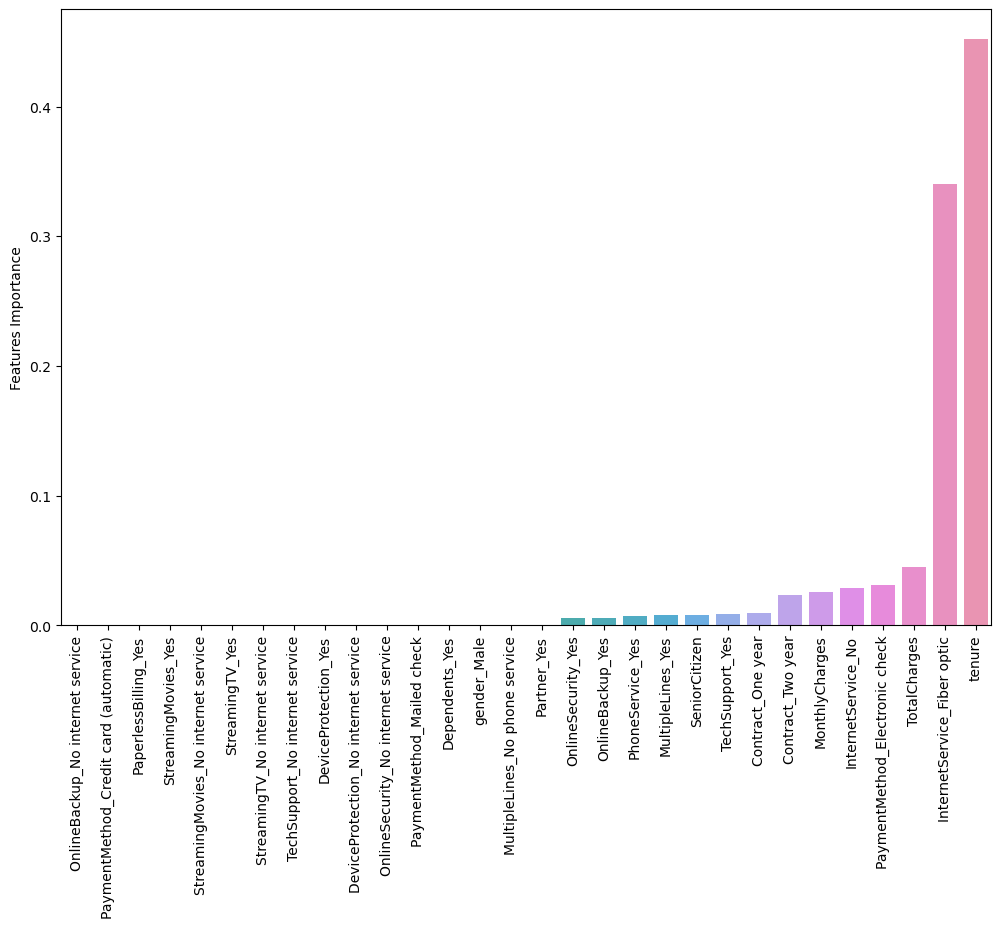

In [110]:
plt.figure(figsize=(12,8),dpi=100)
sns.barplot(data=features, x=features.index, y='Features Importance')
plt.xticks(rotation=90);

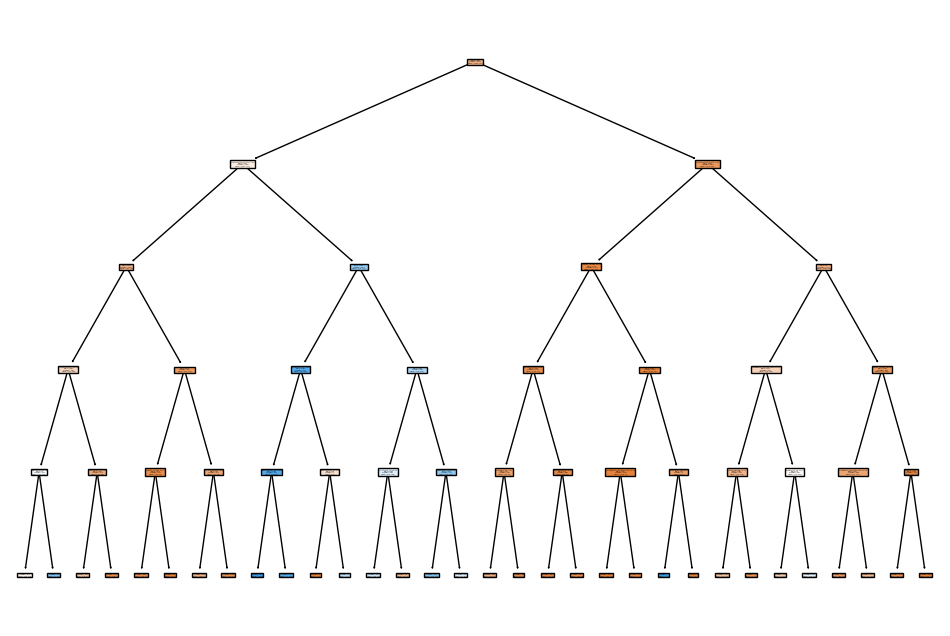

In [101]:
plt.figure(figsize=(12,8),dpi=100)
plot_tree(tree_classifier,filled=True,feature_names=X.columns);

## Random Forest

**Task: Create a random forest model, then print a "classification report" and an error matrix for the predicted results on a test dataset.**

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
random_classifier = RandomForestClassifier()

In [106]:
random_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [107]:
random_predict = random_classifier.predict(X_test)

In [109]:
print(classification_report(y_test, random_predict))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       557
           1       0.52      0.46      0.49       147

    accuracy                           0.80       704
   macro avg       0.69      0.68      0.68       704
weighted avg       0.79      0.80      0.80       704



In [113]:
confusion_matrix(y_test, random_predict)

array([[495,  62],
       [ 79,  68]])

## Boosted Trees

**Assignment: Create an AdaBoost or Gradient Boosting model, then produce a "classification report" and error matrix for the predicted results on a test dataset.**

In [114]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [115]:
ada_classifier = AdaBoostClassifier(random_classifier)

In [117]:
ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier())

In [123]:
ada_predict  = ada_classifier.predict(X_test)

In [124]:
print(classification_report(y_test, ada_predict))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       557
           1       0.54      0.45      0.49       147

    accuracy                           0.81       704
   macro avg       0.70      0.67      0.69       704
weighted avg       0.79      0.81      0.80       704



In [125]:
confusion_matrix(y_test, ada_predict)

array([[501,  56],
       [ 81,  66]])

In [126]:
gradient_classifier = GradientBoostingClassifier()

In [127]:
gradient_classifier.fit(X_train,y_train)

GradientBoostingClassifier()

In [128]:
grad_predict = gradient_classifier.predict(X_test)

In [129]:
print(classification_report(y_test, grad_predict))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       557
           1       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



In [130]:
confusion_matrix(y_test, grad_predict)

array([[503,  54],
       [ 74,  73]])

### Great job!